# Netflix Data Analysis
  This analysis answers specific questions about movies and TV shows, including their show IDs, directors, release years, categories, and more. The analysis uses Python with libraries such as Pandas, NumPy, Matplotlib, and Seaborn for data manipulation and visualization. Below, each question is addressed with code, explanations, and output interpretations.

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading the Dataset
`pd.read_csv()` function loads the Netflix dataset from a CSV file into a Pandas DataFrame, enabling data manipulation and analysis.

In [2]:
df = pd.read_csv('NetflixData.csv')
df.head(7)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [3]:
df.shape

(7789, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s684,Movie,Backfire,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [6]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [7]:
df['Category'].unique()
df['Director'].nunique()
df['Country'].nunique()
df['Type'].nunique()

df['Category'].value_counts()
df['Director'].value_counts()
df['Country'].value_counts()
df['Type'].value_counts()

Type
Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Docuseries, Science & Nature TV, TV Action & Adventure           1
British TV Shows, Classic & Cult TV, Kids' TV                    1
Docuseries, TV Sci-Fi & Fantasy                                  1
Children & Family Movies, Dramas, Music & Musicals               1
Name: count, Length: 492, dtype: int64

In [8]:
cat=[]
con=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)

print("Categorical: ",cat, "\n", "Numerical: ",con)

Categorical:  ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description'] 
 Numerical:  []


For 'House of Cards', what is the Show Id and Who is the Director of this show?


In [9]:
HoC = df[df['Title']=='House of Cards'][['Show_Id', 'Director', 'Country','Rating', 'Duration']]
HoC

,Show_Id,Director,Country,Rating,Duration
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J...",United States,TV-MA,6 Seasons


In which year the highest number of TV Shows & Movies were released? Show with Bar Graph.

`Year` extracted from `Release_Date` using `pd.to_datetime()`. 
`value_counts()` method counts releases per year, 
`idxmax()` identifies the year with the most releases.



In [10]:
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df['Year']

0       2020.0
1       2016.0
2       2018.0
3       2017.0
4       2020.0
         ...  
7784    2020.0
7785    2019.0
7786    2020.0
7787    2020.0
7788    2020.0
Name: Year, Length: 7789, dtype: float64

In [11]:
Total_movies = df['Year'].value_counts().idxmax()

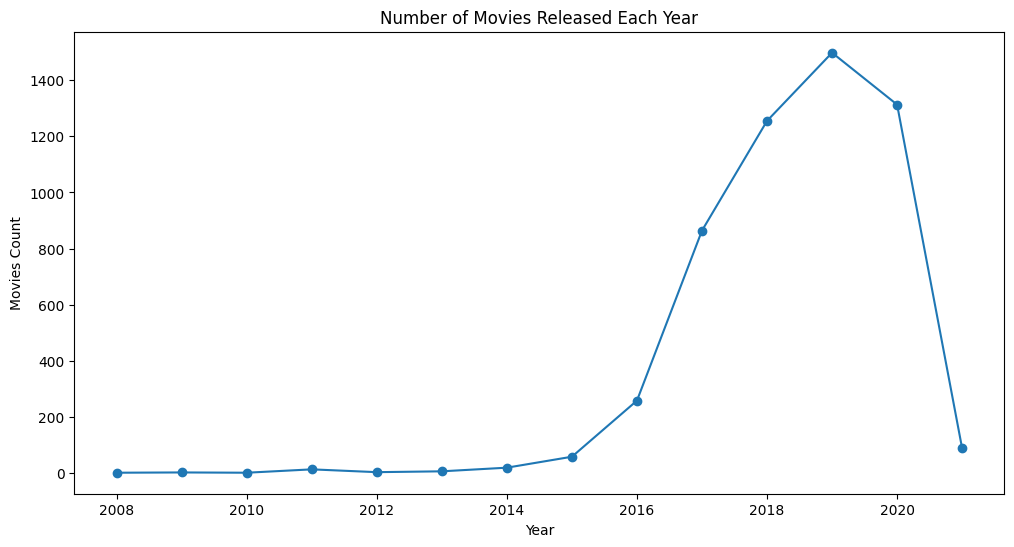

In [12]:
# Line chart: Movies count by year
movies_per_year = df[df['Category'] == 'Movie']['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Movies Count')
plt.show()

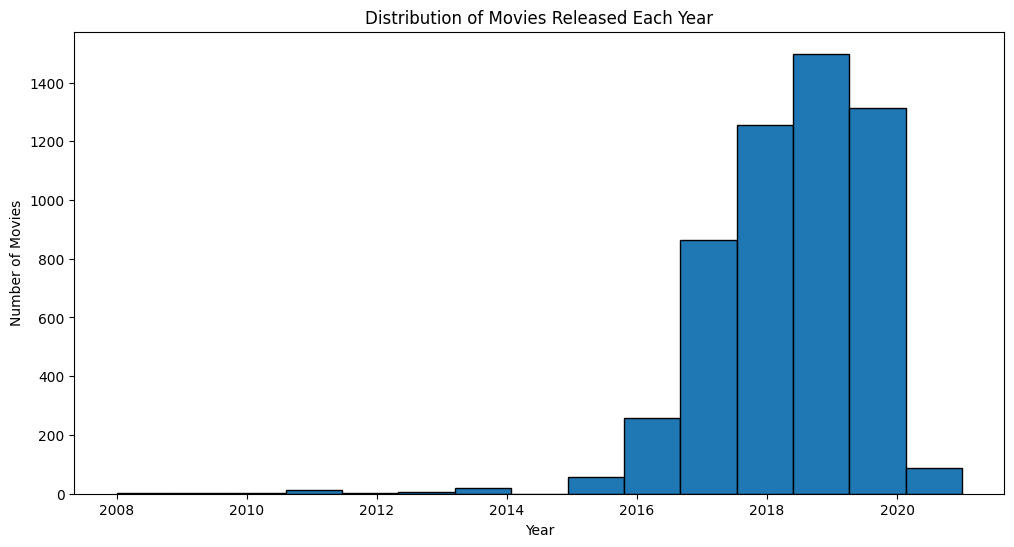

In [13]:
# Histogram: Movies count by year
plt.figure(figsize=(12,6))
plt.hist(df[df['Category'] == 'Movie']['Year'].dropna(), bins=15, edgecolor='black')
plt.title('Distribution of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Year with highest number of releases: 2019.0


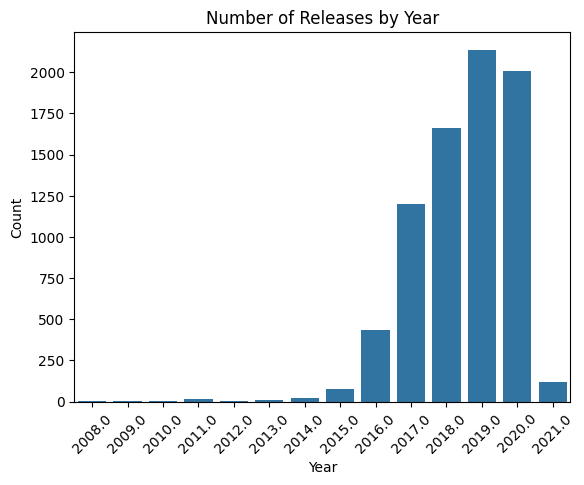

In [14]:
print(f'Year with highest number of releases: {Total_movies}')
plt.Figure(figsize=(15,6))
sns.countplot(data=df, x='Year')
plt.title('Number of Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Movies & TV Shows are in the dataset? Show with Bar Graph.
The `value_counts()` method on the `Category` column counts the number of Movies and TV Shows. A bar graph is created using `sns.countplot()` to visualize the counts.

The output shows the counts of Movies and TV Shows, with a bar graph comparing the two categories. The height of each bar represents the number of entries.

Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


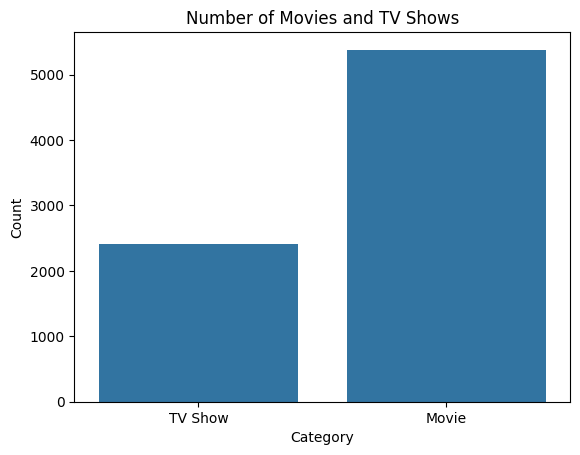

In [15]:
category_counts = df['Category'].value_counts()
print(category_counts)
sns.countplot(data=df, x='Category')
plt.title('Number of Movies and TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Show all the Movies that were released in year 2000.



YearWise Movies Count

In [16]:
movies_per_year = df[df['Category'] == 'Movie']['Year'].value_counts().sort_index()
for year, count in movies_per_year.items():
    print(f"{year}: {count}")

2008.0: 1
2009.0: 2
2010.0: 1
2011.0: 13
2012.0: 3
2013.0: 6
2014.0: 19
2015.0: 58
2016.0: 258
2017.0: 864
2018.0: 1255
2019.0: 1498
2020.0: 1313
2021.0: 88


In [17]:
movies_2020 = df[(df['Category'] == 'Movie') & (df['Year'] == 2020)][['Show_Id', 'Title', 'Director', 'Release_Date']]
movies_2020

,Show_Id,Title,Director,Release_Date
4,s5,21,Robert Luketic,"January 1, 2020"
6,s7,122,Yasir Al Yasiri,"June 1, 2020"
14,s15,3022,John Suits,"March 19, 2020"
27,s28,#Alive,Cho Il,"September 8, 2020"
28,s29,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","July 1, 2020"
...,...,...,...,...
7762,s7761,Zaki Chan,Wael Ihsan,"May 19, 2020"
7783,s7782,Zoom,Peter Hewitt,"January 11, 2020"
7784,s7783,Zozo,Josef Fares,"October 19, 2020"
7786,s7785,Zulu Man in Japan,NaN,"September 25, 2020"


##  Show only the Titles of all TV Shows that were released in India only.
**Code Explanation**: The DataFrame is filtered for `Category` as 'TV Show' and `Country` as 'India', selecting only the `Title` column.



In [18]:
TvShows_India = df[(df['Category'] == 'TV Show') & (df['Country'] == 'India')]['Title'] 

TvShows_India

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

## Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix?

`value_counts()` method on the `Director` column counts the number of titles per director,and `head(10)`. A bar plot is created to visualize the results.



Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Ryan Polito                8
Name: count, dtype: int64


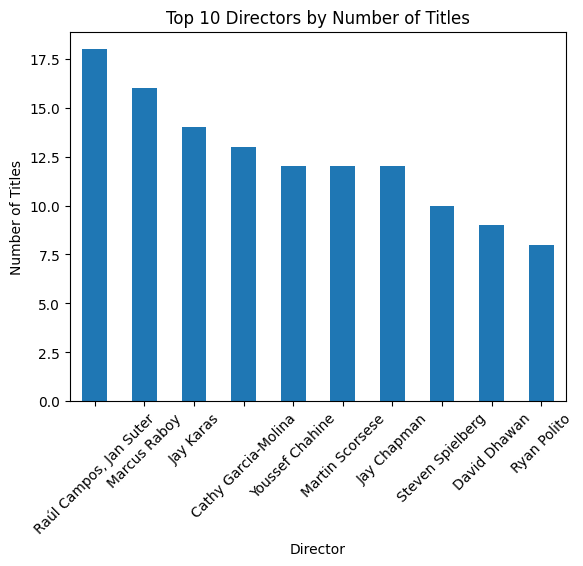

In [19]:
top_directors = df['Director'].value_counts().head(10)
print(top_directors)
top_directors.plot(kind='bar')
#plt.bar(df['Director'])
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## All Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom"


In [20]:
comedies_uk = df[((df['Category'] == 'Movie') & (df['Type'].str.contains('Comedies'))) | (df['Country'] == 'United Kingdom')]
comedies_uk

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0
36,s37,Movie,#Selfie,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,"June 1, 2019",TV-MA,125 min,"Comedies, Dramas, International Movies","Two days before their final exams, three teen ...",2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7766,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...,2019.0
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,2019.0
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,"July 1, 2017",TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",2017.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0


## Tom Cruse Movies

In [21]:
tom_cruise_count = df['Cast'].str.contains('Tom Cruise', na=False).sum()
print(f'Number of movies/shows with Tom Cruise: {tom_cruise_count}')

Number of movies/shows with Tom Cruise: 2


## What are the different Ratings defined by Netflix?

In [22]:
ratings = df['Rating'].unique()
print('Different Ratings:', ratings)

Different Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']


## How many Movies got the 'TV-14' rating, in Canada?



In [23]:
tv14_canada = df[(df['Category'] == 'Movie') & (df['Rating'] == 'TV-14') & (df['Country'].str.contains('Canada', na=False))].shape[0]
print(f'Movies with TV-14 rating in Canada: {tv14_canada}')

Movies with TV-14 rating in Canada: 26


## How many TV Shows got the 'R' rating, after year 2018?



In [24]:
r_tv_after_2018 = df[(df['Category'] == 'TV Show') & (df['Rating'] == 'R') & (df['Year'] > 2018)].shape[0]
print(f'TV Shows with R rating after 2018: {r_tv_after_2018}')

TV Shows with R rating after 2018: 1


##  What is the maximum duration of a Movie/Show on Netflix?



In [25]:
df[['Minutes', 'Unit']] = df['Duration'].str.split(' ', expand=True)
df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')
max_movie_duration = df[df['Unit'] == 'min']['Minutes'].max()
max_tv_seasons = df[df['Unit'].isin(['Season', 'Seasons'])]['Minutes'].max()
print(f'Maximum movie duration: {max_movie_duration} minutes')
print(f'Maximum TV show seasons: {max_tv_seasons} seasons')

Maximum movie duration: 312 minutes
Maximum TV show seasons: 16 seasons


##  Which individual country has the Highest No. of TV Shows?



In [26]:
tv_shows_by_country = df[df['Category'] == 'TV Show']['Country'].value_counts()
top_country = tv_shows_by_country.idxmax()
top_count = tv_shows_by_country.max()
print(f'Country with highest number of TV Shows: {top_country} ({top_count} shows)')

Country with highest number of TV Shows: United States (705 shows)


## How can we sort the dataset by Year?



In [27]:
sorted_by_year = df.sort_values('Year')
sorted_by_year

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008.0,1,Season
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008.0,81,min
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010.0,84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,s6951,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom","January 8, 2018",TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...,NaN,4,Seasons
6998,s6997,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,"December 25, 2015",TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...,NaN,7,Seasons
7448,s7447,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,"August 1, 2017",TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ...",NaN,3,Seasons
7524,s7523,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,"March 31, 2017",TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...,NaN,2,Seasons


## Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.



In [ ]:
result = df[
    ((df['Category'] == 'TV Show') & (df['Type'].str.contains("Kids' TV", na=False))) |
    ((df['Category'] == 'Movie') & (df['Type'] == 'Dramas'))
]


result

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Minutes,Unit
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019.0,119,min
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2019.0,2,Seasons
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0,2,Seasons
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019.0,110,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,s7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019.0,2,Seasons
7761,s7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,3,Seasons
7768,s7767,TV Show,Zig & Sharko,NaN,NaN,France,"December 1, 2017",TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",2017.0,1,Season
7777,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020.0,1,Season


<Axes: xlabel='Year', ylabel='Category'>

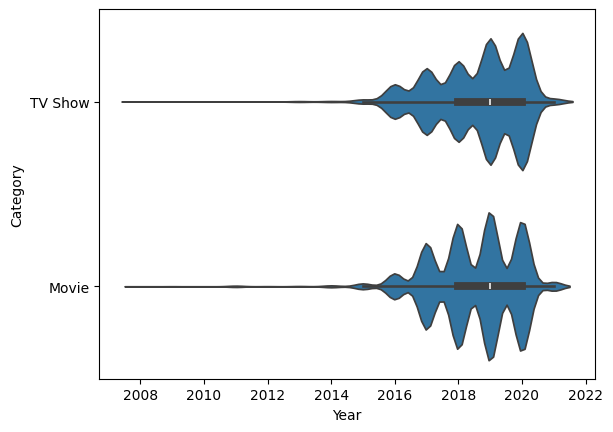

In [33]:
sns.violinplot(data=df,x="Year", y ="Category")


<Axes: xlabel='Category', ylabel='Year'>

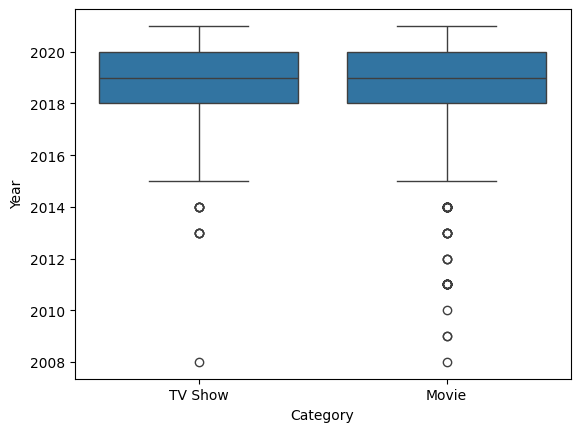

In [43]:
sns.boxplot(data=df,x="Category", y ="Year")

 
Following functions and methods were utilized in this analysis, demonstrating their utility in data manipulation, exploration, and visualization:

| **Function/Method** | **Library** | **Use Case** |
|---------------------|-------------|--------------|
| `pd.read_csv()` | Pandas | Loads a CSV file into a DataFrame for analysis. |
| `df.head()` | Pandas | Displays the first five rows to preview the dataset structure. |
| `df.info()` | Pandas | Summarizes DataFrame metadata, including column types and non-null counts. |
| `df.tail()` | Pandas | Shows the last five rows of the DataFrame. |
| `df.dtypes` | Pandas | Lists the data types of each column. |
| `df['column'].value_counts()` | Pandas | Counts unique values in a column, useful for frequency analysis. |
| `df.isna().sum()` | Pandas | Calculates the number of missing values per column. |
| `df.shape` | Pandas | Returns the dimensions (rows, columns) of the DataFrame. |
| `df.columns` | Pandas | Lists all column names in the DataFrame. |
| `pd.to_datetime()` | Pandas | Converts a column to datetime format for date-based operations. |
| `df['column'].str.contains()` | Pandas | Searches for a substring within a column, handling partial matches. |
| `df.sort_values()` | Pandas | Sorts the DataFrame by specified columns. |
| `sns.countplot()` | Seaborn | Creates a bar plot to visualize categorical data counts. |
| `plt.plot()` | Matplotlib | Generates a bar plot for visualizing data distributions. |
| `df['column'].unique()` | Pandas | Retrieves unique values in a column. |

